In [1]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold   
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

C:\Users\enesg\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
#taking breast-cancer-data from github which is taken from kaggle
df = pd.read_csv("https://raw.githubusercontent.com/r0sky/BreastCancerPrediction/master/breast-cancer-data.csv")

In [3]:
#Exploring Data
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [5]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

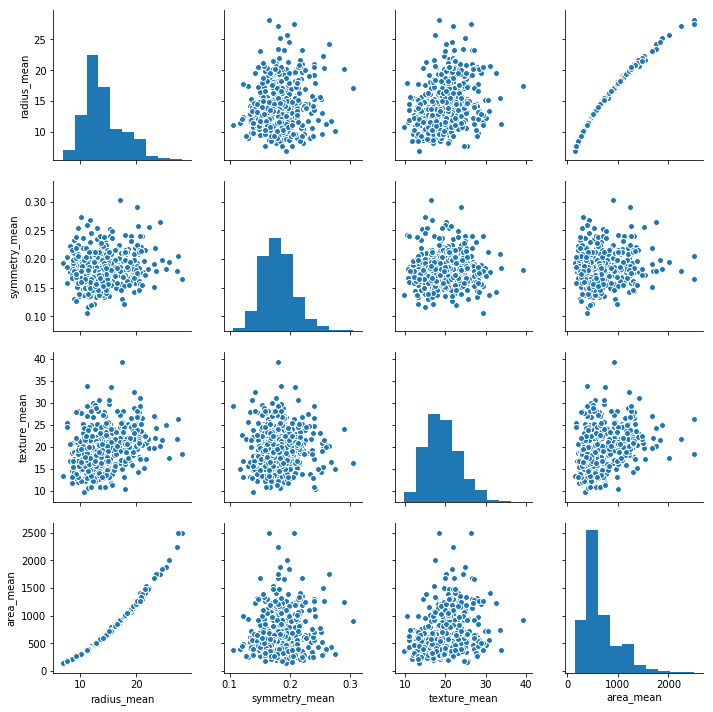

In [6]:
#we can see the relationships between specified columns
sns.pairplot(df,vars=["radius_mean","symmetry_mean","texture_mean","area_mean"])

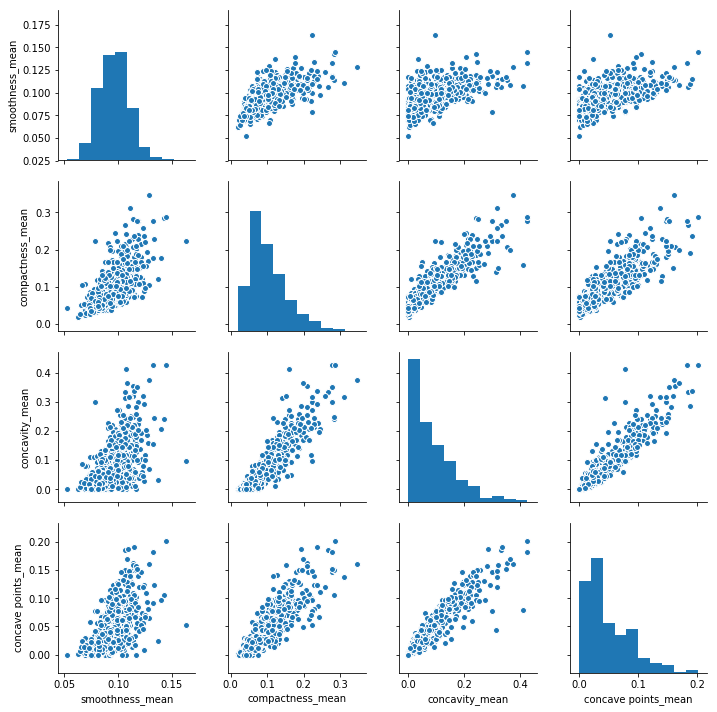

In [7]:
sns.pairplot(df,vars=['smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean'])

In [8]:
#dropping columns that i don't want
df.drop('id',axis=1,inplace=True)
df.drop('Unnamed: 32',axis=1,inplace=True)

In [9]:
#copying data without some columns
df1=df.drop(['concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],axis=1)



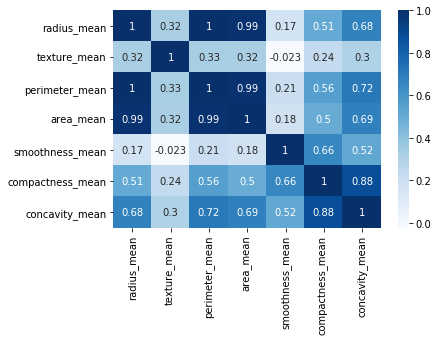

In [10]:
#Exploring with heatmap
sns.heatmap(df1.corr(),cmap = 'Blues', annot=True)





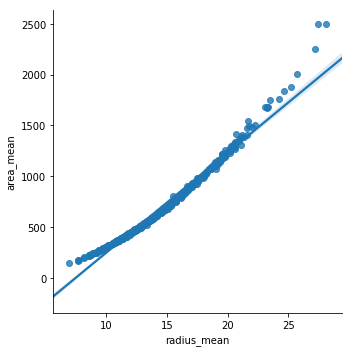

In [11]:
#its crystal clear that when radius increases area also increases
sns.lmplot(x='radius_mean',y='area_mean',data=df)

In [12]:
#showing diagnosis values
df.diagnosis.unique()

array(['M', 'B'], dtype=object)

In [13]:
#want to change M,B with 1,0
df['diagnosis'] = df['diagnosis'].map({'M':1,'B':0})
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [14]:
df.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [15]:
#creating dataframe without target column
df2=df.drop(['diagnosis'],axis=1)

In [16]:
#Target column is diagnosis 
target=df.diagnosis

In [17]:
#doing 10-fold cross validation
from sklearn.model_selection import RepeatedKFold 
kf = RepeatedKFold(n_splits=5, n_repeats=10, random_state=2652124)

In [18]:
model=LogisticRegression()
for train_index, test_index in kf.split(df1):
    X_train, X_test = df2.iloc[train_index], df2.iloc[test_index] 
    y_train, y_test = target.iloc[train_index], target.iloc[test_index]

# Logistic Regression Model


In [19]:
#fitting model and making prediction
model=LogisticRegression()
model.fit(X_train,y_train)

pred = model.predict(X_test)

In [20]:
#creating confusion matrix
cm = confusion_matrix(y_test, pred)
cm

array([[71,  1],
       [ 3, 38]], dtype=int64)

In [21]:
#showing accuracy score
accuracy_score(y_test, pred)

0.9646017699115044

In [37]:
#Null Accuracy
y_test.value_counts()

0    72
1    41
Name: diagnosis, dtype: int64

In [38]:
#calculate the percentage of ones
y_test.mean()

0.36283185840707965

In [39]:
# calculate the percentage of zeros
1 - y_test.mean()

0.6371681415929203

In [22]:
#making prediction with predic_proba method
pred=model.predict_proba(X_test)
pred = pred[:, 1]

In [23]:
#calculating auc score
auc = roc_auc_score(y_test, pred)
print('AUC: %.3f' % auc)

AUC: 0.998


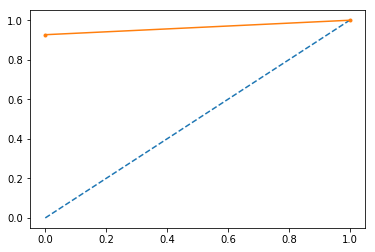

In [41]:
#showing roc curve
fpr, tpr, thresholds = roc_curve(y_test, pred)
# plot no skill
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(fpr, tpr, marker='.')
# show the plot
pyplot.show()


# Decision Tree Classifier

In [25]:
#fitting model and making prediction
model1 = DecisionTreeClassifier()
model1.fit(X_train,y_train)

pred = model1.predict(X_test)


In [26]:
cm = confusion_matrix(y_test, pred)
cm

array([[69,  3],
       [ 2, 39]], dtype=int64)

In [27]:
accuracy_score(y_test, pred)

0.9557522123893806

In [28]:
#making prediction with predic_proba method
pred=model1.predict_proba(X_test)
pred = pred[:, 1]

In [29]:
#calculating auc score
auc = roc_auc_score(y_test, pred)
print('AUC: %.3f' % auc)

AUC: 0.955


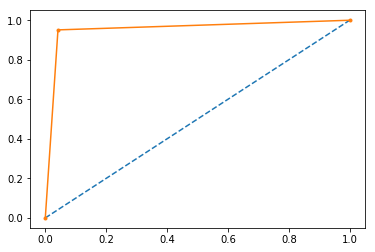

In [30]:
#showing roc curve
fpr, tpr, thresholds = roc_curve(y_test, pred)
# plot no skill
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(fpr, tpr, marker='.')
# show the plot
pyplot.show()

# Random Forest Classifier

In [31]:
#creating model,fitting, making prediction and creating confusion matrix
model2 = RandomForestClassifier(n_estimators=100,min_samples_split=25, max_depth=7, max_features=2)
model2.fit(X_train,y_train)
#making prediction with predic_proba method
pred=model2.predict_proba(X_test)

In [32]:
pred = pred[:, 1]

In [33]:
#calculating auc score
auc = roc_auc_score(y_test, pred)
print('AUC: %.3f' % auc)

AUC: 0.993


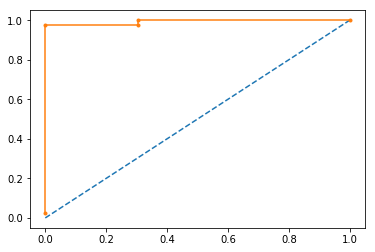

In [34]:
#showing roc curve
fpr, tpr, thresholds = roc_curve(y_test, pred)
# plot no skill
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(fpr, tpr, marker='.')
# show the plot
pyplot.show()

In [35]:
pred=model2.predict(X_test)
cm = confusion_matrix(y_test, pred)
cm


array([[72,  0],
       [ 3, 38]], dtype=int64)

In [36]:
accuracy_score(y_test, pred)

0.9734513274336283